# 1 Import the required libraries and read the dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
fifa_df = pd.read_csv('fifa.csv')
fifa_info_df = pd.read_csv('fifa_variable_information.csv')

# 2 Check the first few samples, shape, and info of the data:

In [3]:
# Display the first few rows
print(fifa_df.head())

# Display the shape of the dataframe
print(fifa_df.shape)

# Display information about the dataset
print(fifa_df.info())


       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

# 3 Drop redundant columns:

In [4]:
# Dropping columns like 'Photo', 'Flag', 'Club Logo'
fifa_df = fifa_df.drop(['Photo', 'Flag', 'Club Logo'], axis=1)


# 4 Convert 'Value', 'Wage', and 'Release Clause' to float:

In [7]:
def convert_currency(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'M' in value:
            return float(value[1:-1]) * 1000000
        elif 'K' in value:
            return float(value[1:-1]) * 1000
        else:
            return float(value[1:])
    else:
        return value  # If it's not a string, return the value as is

# Apply the function to the relevant columns
fifa_df['Value'] = fifa_df['Value'].apply(convert_currency)
fifa_df['Wage'] = fifa_df['Wage'].apply(convert_currency)
fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(convert_currency)

fifa_df['Release Clause'] = fifa_df['Release Clause'].apply(convert_currency)

# 5 Convert 'Joined' into integer (year only):

In [9]:
fifa_df['Joined'] = pd.to_datetime(fifa_df['Joined'], errors='coerce').dt.year

#  6 Convert 'Contract Valid Until' to datetime:

In [10]:
fifa_df['Contract Valid Until'] = pd.to_datetime(fifa_df['Contract Valid Until'], errors='coerce')

# 7 Convert 'Height' to float:

In [12]:
def convert_height(height):
    if isinstance(height, str):  # Ensure the value is a string
        return float(height.replace("'", "."))
    else:
        return height  # If not a string, return the value as is

# Apply the conversion function to the 'Height' column
fifa_df['Height'] = fifa_df['Height'].apply(convert_height)


# 8 Convert 'Weight' to float:

In [14]:
def convert_weight(weight):
    if isinstance(weight, str):  # Ensure the value is a string
        return float(weight.replace("lbs", "").strip())
    else:
        return weight  # If not a string, return the value as is

# Apply the conversion function to the 'Weight' column
fifa_df['Weight'] = fifa_df['Weight'].apply(convert_weight)


# 9 Check for missing values and impute:

In [ ]:
missing_values = fifa_df.isnull().mean() * 100
print(missing_values[missing_values > 0])

# Imputation can be done based on the context, e.g. mean, median, or mode for numeric values
fifa_df['Joined'].fillna(fifa_df['Joined'].median(), inplace=True)
fifa_df['Contract Valid Until'].fillna(fifa_df['Contract Valid Until'].mode()[0], inplace=True)
fifa_df.fillna(fifa_df.median(numeric_only=True), inplace=True)  # For other numeric fields

# 10 Plot the distribution of Overall rating:

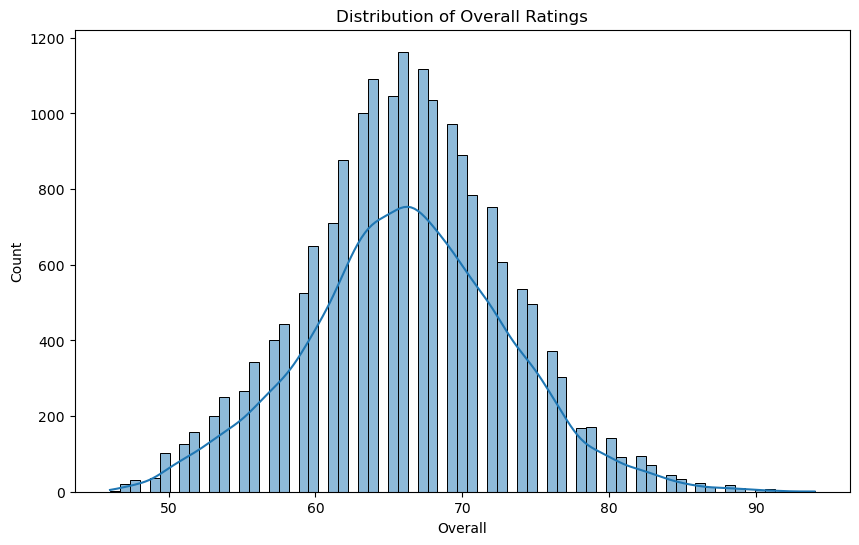

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(fifa_df['Overall'], kde=True)
plt.title('Distribution of Overall Ratings')
plt.show()

# 11 Retrieve names of top 20 players based on Overall rating:

In [16]:
top_20_players = fifa_df.sort_values(by='Overall', ascending=False).head(20)
print(top_20_players['Name'])

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
12             D. Godín
13          David Silva
9              J. Oblak
11             T. Kroos
10       R. Lewandowski
20      Sergio Busquets
24         G. Chiellini
23            S. Agüero
22             M. Neuer
21            E. Cavani
16              H. Kane
Name: Name, dtype: object


# 12 Generate a dataframe of top 20 players:

In [17]:
top_20_df = fifa_df.sort_values(by='Overall', ascending=False).head(20)

# 13 Average 'Age' and 'Wage' of top 20 players: 

In [18]:
avg_age = top_20_df['Age'].mean()
avg_wage = top_20_df['Wage'].mean()
print(f"Average Age: {avg_age}, Average Wage: {avg_wage}")

Average Age: 29.55, Average Wage: 294950.0


# 14 Player with the highest wage:

In [19]:
highest_wage_player = top_20_df.loc[top_20_df['Wage'].idxmax()]
print(f"Player with the highest wage: {highest_wage_player['Name']} with wage {highest_wage_player['Wage']}")

Player with the highest wage: L. Messi with wage 565000.0


# 15 Generate dataframe with 'Player name', 'Club Name', 'Wage', and 'Overall rating':

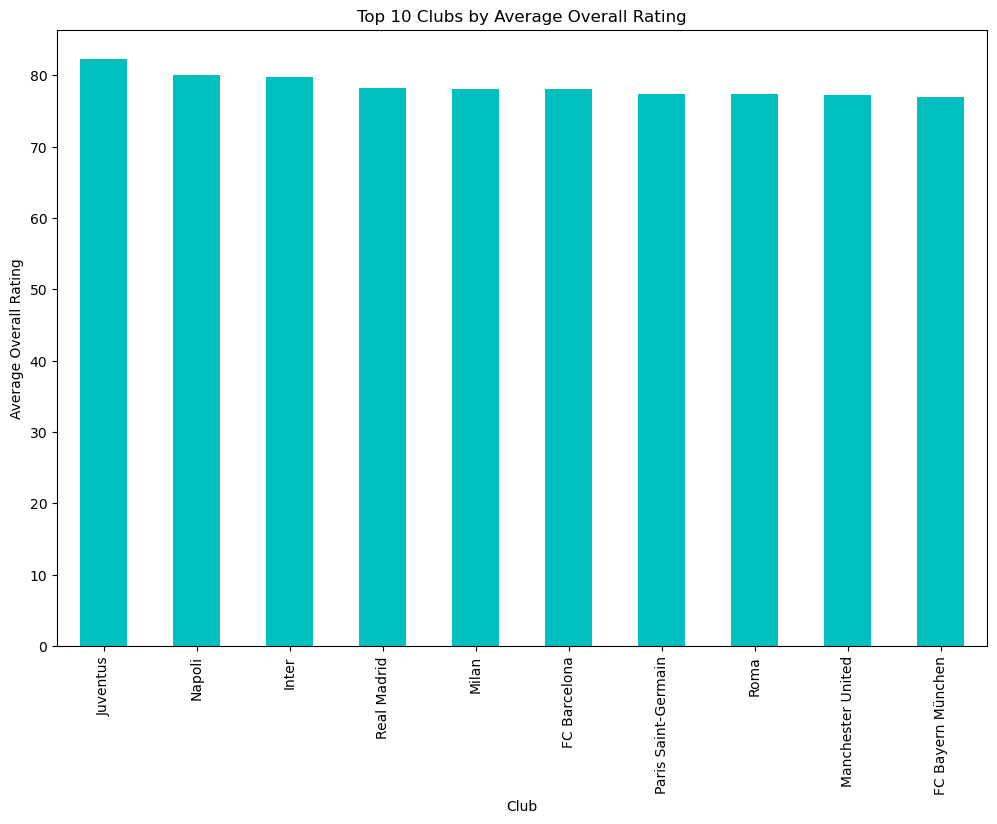

In [20]:
player_club_wage_overall_df = fifa_df[['Name', 'Club', 'Wage', 'Overall']]

# Average overall rating for each club
club_avg_overall = player_club_wage_overall_df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,8))
club_avg_overall.plot(kind='bar', color='c')
plt.title('Top 10 Clubs by Average Overall Rating')
plt.ylabel('Average Overall Rating')
plt.show()

# 16 Relationship between age and individual potential: 

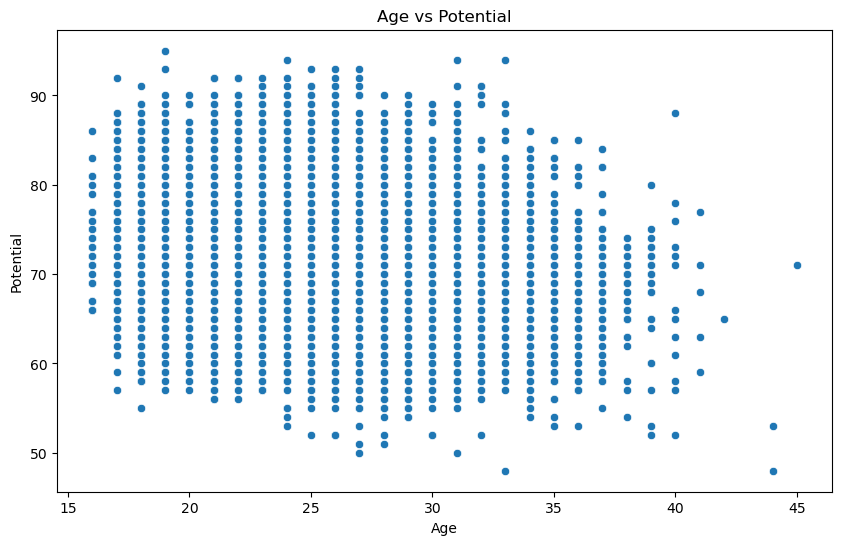

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=fifa_df, x='Age', y='Potential')
plt.title('Age vs Potential')
plt.show()

# 17 Features contributing to wages:

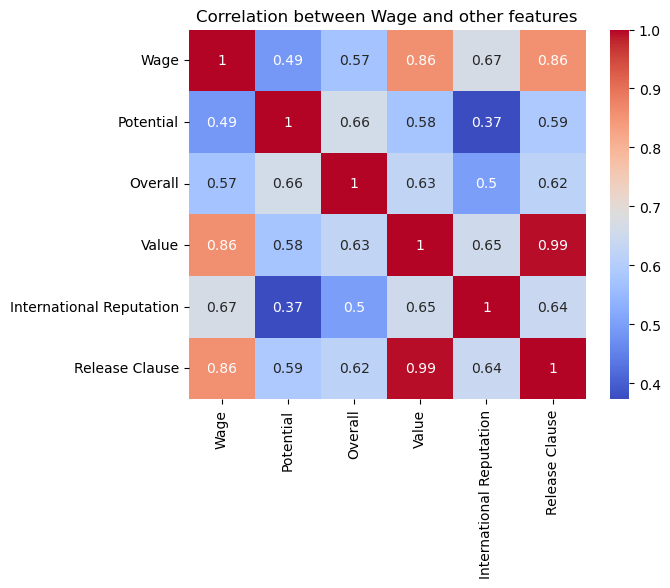

In [22]:
correlation = fifa_df[['Wage', 'Potential', 'Overall', 'Value', 'International Reputation', 'Release Clause']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Wage and other features')
plt.show()

# 18 Positions with max and min players: 

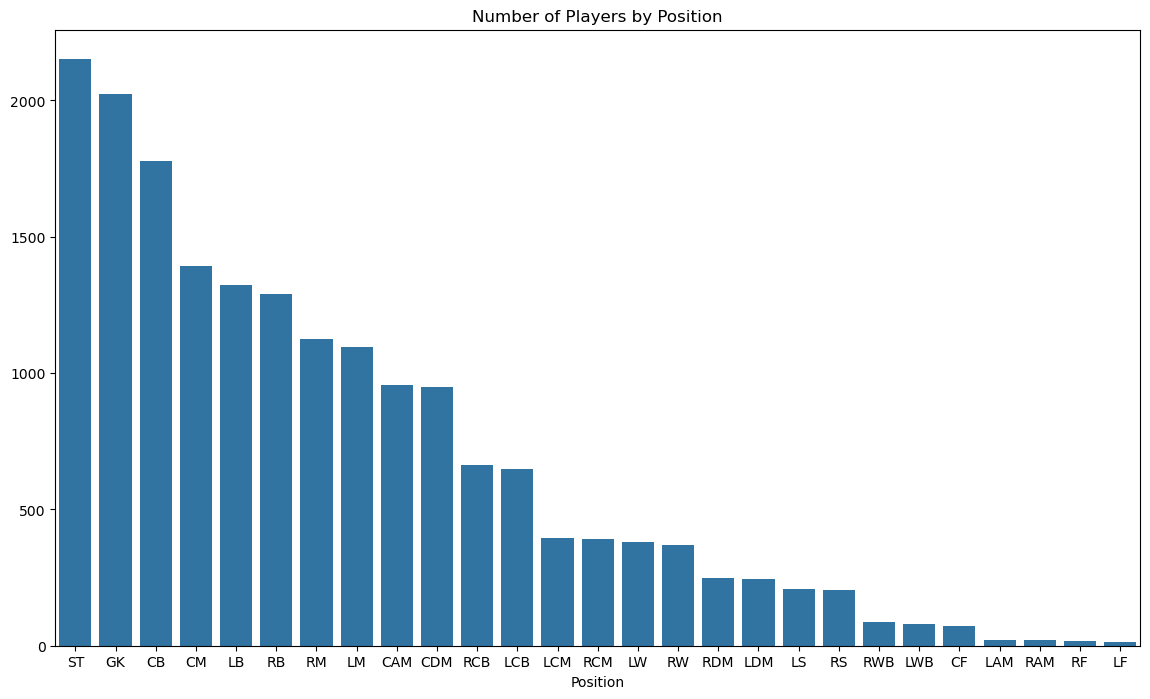

Max players in position: ST, Min players in position: LF


In [23]:
position_count = fifa_df['Position'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x=position_count.index, y=position_count.values)
plt.title('Number of Players by Position')
plt.show()

max_position = position_count.idxmax()
min_position = position_count.idxmin()
print(f"Max players in position: {max_position}, Min players in position: {min_position}")

# 19 Players from Juventus with wage > 200K: 

In [25]:
juve_high_wage = fifa_df[(fifa_df['Club'] == 'Juventus') & (fifa_df['Wage'] > 200000)]
print(juve_high_wage)

        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Composure  Marking  \
1   77000000.0  405000.0          Right  ...       95.0     28.0   
15  89000000.0  205000.0           Left  ...       84.0     23.0   
24  27000000.0  215000.0           Left  ...       84.0     93.0   

    StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
1             31.0          23.0      7.0       11.0       15.0   
15            20.0          20.0      5.0        4.0        4.0   
24            93.0          90.0      3.0        3.0        2.0   

    GKPositioning GKReflexes Release Clause  
1            14.0       11.0    127100000.0  
15            5.0        8.0    153500000.0  

# 20  Top 5 players by overall rating for each unique position:

In [26]:
top_5_by_position = fifa_df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)
print(top_5_by_position)


         ID               Name  Age Nationality  Overall  Potential  \
0    194765       A. Griezmann   27      France       89         90   
1    190460         C. Eriksen   26     Denmark       88         91   
2    201942    Roberto Firmino   26      Brazil       86         87   
3    189596          T. Müller   28     Germany       86         86   
4    176635            M. Özil   29     Germany       86         86   
..      ...                ...  ...         ...      ...        ...   
130   20801  Cristiano Ronaldo   33    Portugal       94         94   
131  188545     R. Lewandowski   29      Poland       90         90   
132  202126            H. Kane   24     England       89         91   
133  153079          S. Agüero   30   Argentina       89         89   
134  173731            G. Bale   28       Wales       88         88   

                  Club       Value      Wage Preferred Foot  ...  Composure  \
0      Atlético Madrid  78000000.0  145000.0           Left  ...    

/var/folders/qn/2yt1zg5j7xs25mn0kglwhly80000gn/T/ipykernel_14910/222923995.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_by_position = fifa_df.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)


# 21 Average wage for top 5 players in every position

In [27]:
avg_wage_by_position = top_5_by_position.groupby('Position')['Wage'].mean()
print(avg_wage_by_position)


Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64
